In [4]:
import pandas as pd
from matplotlib.pyplot import *
import datetime
import numpy as np

# Linear regression
path = "pswrgvwall.xls"
info = pd.read_excel(pd.ExcelFile(path),sheet_name=1).fillna(0)
info.iloc[2:,0] = info.iloc[2:,0].apply(lambda x : x.timestamp())
arr = info.iloc[2:,:].to_numpy()
None
# plot(np.linspace(1994,2023,num=len(info)-2), np_arr[:,1])


tensor(9.0597, grad_fn=<MseLossBackward0>)


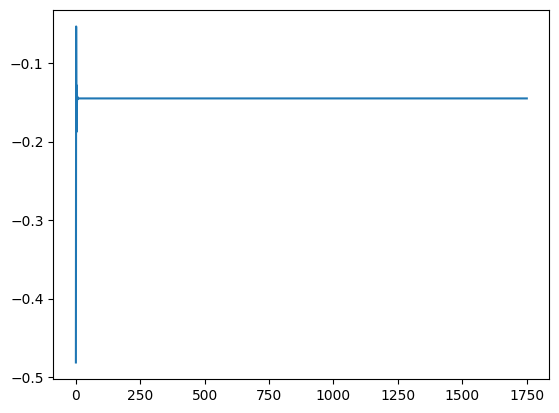

In [100]:
from torch import nn
import torch

model = nn.Sequential(
    nn.Linear(1,10),
    nn.Sigmoid(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
)


model = nn.RNN(1,1,2)

x = torch.from_numpy(np.arange(len(arr[:,1]))).type(torch.float32).unsqueeze(1).requires_grad_(True)
y = torch.from_numpy(arr[:,1].astype(float)).type(torch.float32).unsqueeze(1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.001)

model.train()
for i in range(100):

    pred, a = model(x)
    # print(pred[0])
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(loss)

pred.shape
plot(pred.detach().numpy())

In [114]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(10)

# arr 
# model.fit(arr[:,1],arr[:,2])
# model.predict(a)



C:\Users\kl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: X has 5 features, but RandomForestRegressor is expecting 1 features as input.